In [12]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load dataset
cancer=pd.read_csv(r"C:\Users\Santiago Mendez\Documents\Breast_cancer_dataset.csv")

In [17]:
#VIew first rows
print(cancer.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [18]:
#General information about the dataset
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [12]:
print(cancer.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [19]:
#Distribution of the target variable
print(cancer['diagnosis'].value_counts())
print(cancer['diagnosis'].value_counts(normalize=True))

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


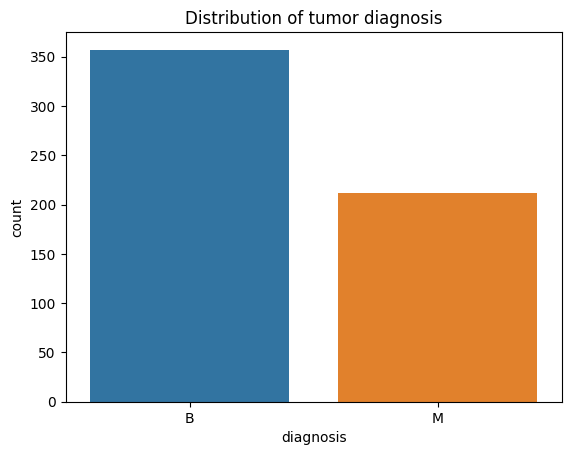

In [20]:
# Visualization: distribution of benign vs malignant tumors
sns.countplot(x='diagnosis',data=cancer)
plt.title("Distribution of tumor diagnosis")
plt.show()

In [21]:
#Section 2, exploratory data analysis
print(cancer.isnull().sum())
if 'id' in cancer.columns:
    cancer=cancer.drop('id',axis=1)
# Convert diagnosis to a categorical type variable
cancer['diagnosis']=cancer['diagnosis'].astype('category')
print(cancer.groupby('diagnosis').mean())

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

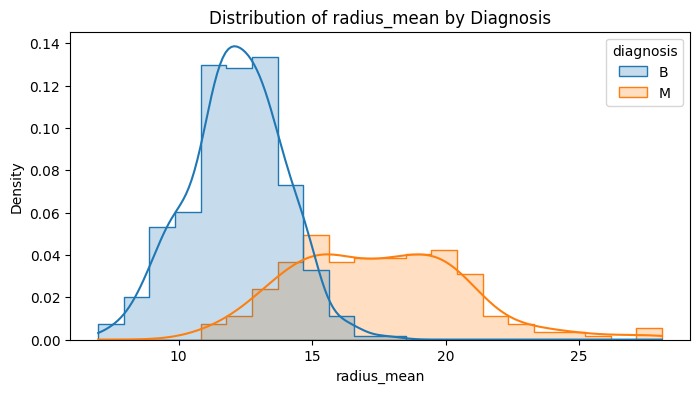

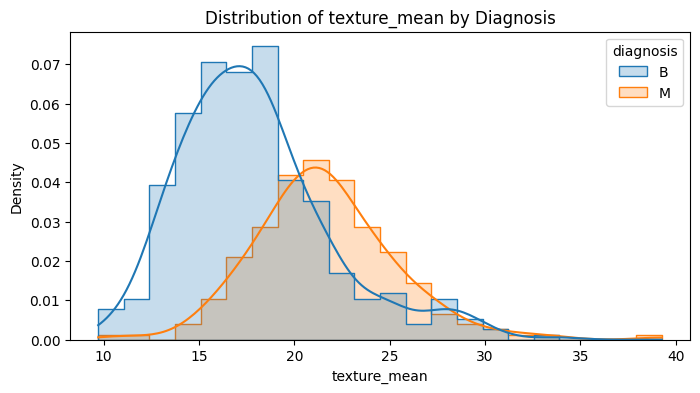

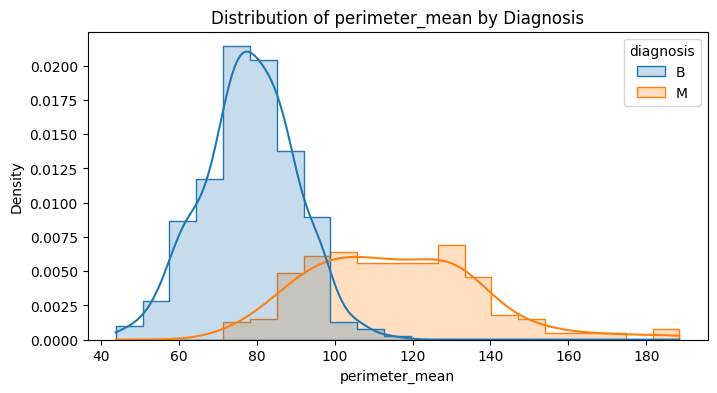

In [22]:
# Visualize distributions 
features=['radius_mean','texture_mean','perimeter_mean']
for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=cancer, x=feature, hue='diagnosis',kde=True,element='step',stat='density')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.show()

C:\Users\Santiago Mendez\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


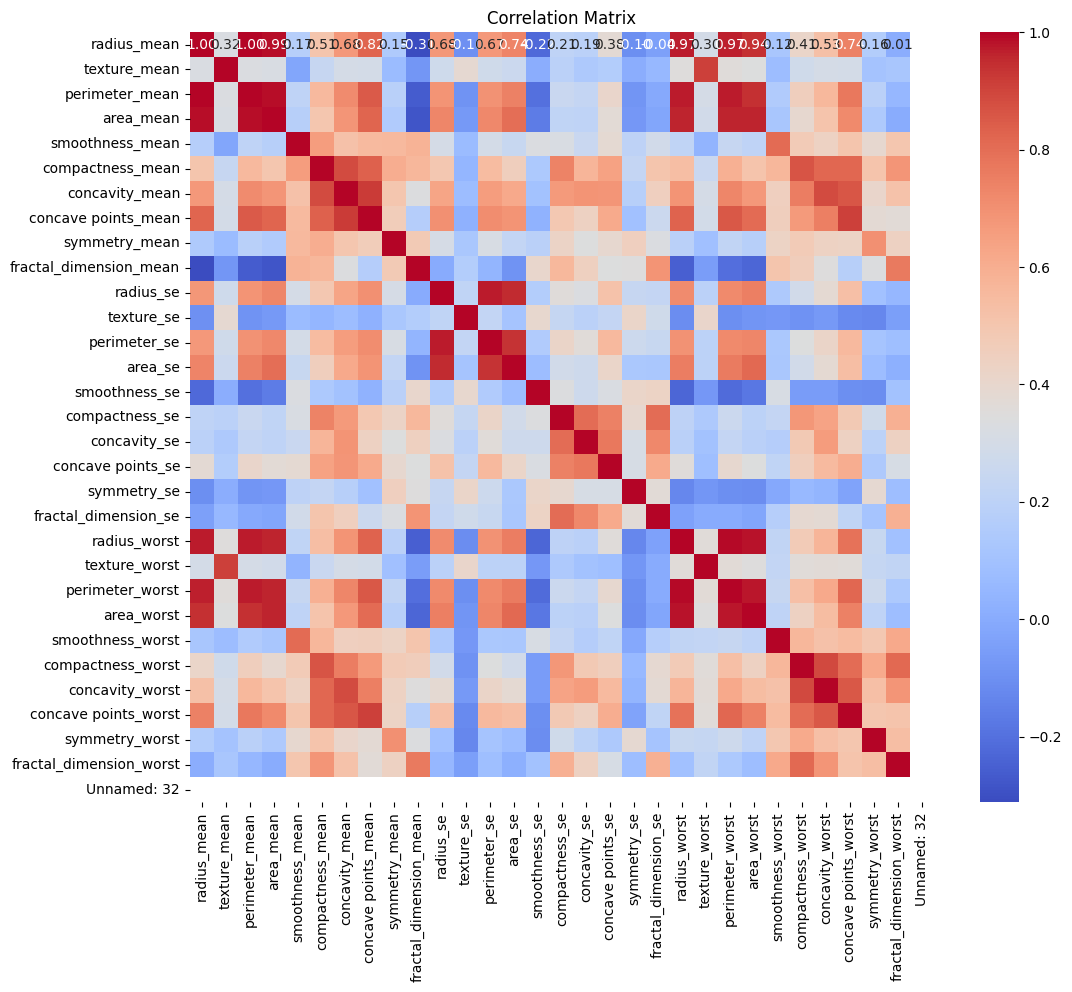

In [23]:
# Correlation matrix for numeric variables
corr_matrix=cancer.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
cols_to_drop=[col for col in cancer.columns if col.startswith('Unnamed')]
cancer=cancer.drop(cols_to_drop, axis=1)
print(cancer.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [25]:
## preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separte features and target
X=cancer.drop('diagnosis',axis=1)
y=cancer['diagnosis'].apply(lambda x:1 if x =='M' else 0)
X_train, X_test, y_train, y_test=train_test_split(
X, y, test_size=0.3, random_state=123, stratify=y)
scaler=StandardScaler()
# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

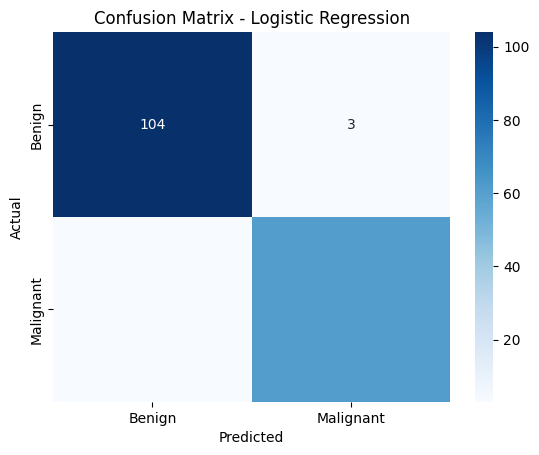

Classification Report: 
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       107
   Malignant       0.95      0.95      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



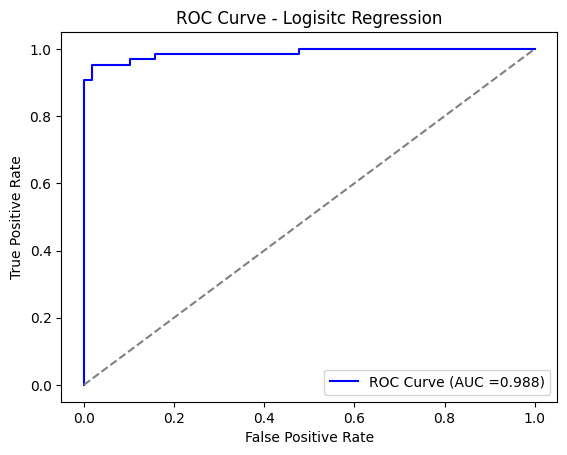

In [26]:
# Model training - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Initialize logistic regression model
log_reg=LogisticRegression(random_state=123, max_iter=1000)
# Train the model 
log_reg.fit(X_train_scaled, y_train)
# Predict on test data (probabilities and classes)
y_pred_prob=log_reg.predict_proba(X_test_scaled)[:,1]
y_pred=log_reg.predict(X_test_scaled)
#COnfusion matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
#Classification report
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=['Benign','Malignant']))
# ROC Curve and AUC
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
auc_score=roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC ={auc_score:.3f})')
plt.plot([0,1],[0,1], color='gray',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logisitc Regression')
plt.legend()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Function to train, predict and evaluate
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)[:,1]if hasattr(model, "predict_proba")else None
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    }
    
    return metrics
#Models to test
models={
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "SVM":SVC(kernel='rbf',probability=True, random_state=123),
    "XGBoost": XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=123)   
}
# Evaluate all models
results={}
for name, model in models.items():
    results[name]=evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
#Show result in a dataframe
results_cancer=pd.DataFrame(results).T
print(results_cancer)

               Accuracy  Precision   Recall  F1 Score   ROC-AUC
Random Forest  0.964912   0.939394  0.96875  0.953846  0.993137
SVM            0.964912   0.939394  0.96875  0.953846  0.990654
XGBoost        0.970760   0.953846  0.96875  0.961240  0.990800


C:\Users\Santiago Mendez\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [11:55:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
!pip install xgboost

     --------------------------------------- 56.8/56.8 MB 10.4 MB/s eta 0:00:00


In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d',cmpa='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show
#ROC curve
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob=model.predict_proba(X_test)[:,1]
        else:
            y_prob=model.decision_function(X-test)
        fpr, tpr,_=roc_curve(y_test, y_prob)
        roc_auc=auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name}(AUC={roc_auc:.2f})')
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

In [55]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
#Function to plot the confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',
               xticklabels=['Bening','Malign'],
               yticklabels=['Bening','Malign'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [56]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(7,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:,1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            # Si no tiene ninguno, saltamos este modelo o damos un warning
            print(f"Model {name} does not support probability predictions.")
            continue
        
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()


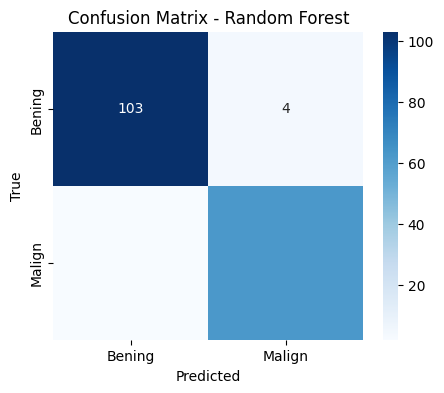

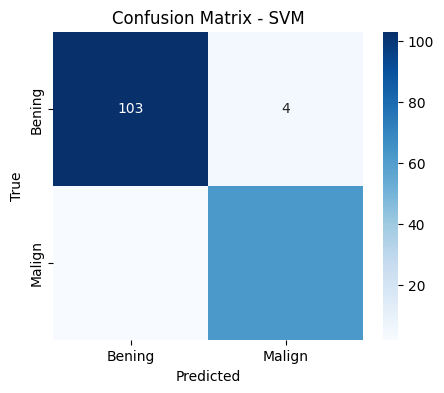

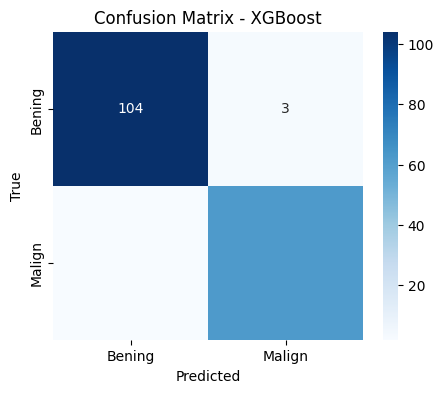

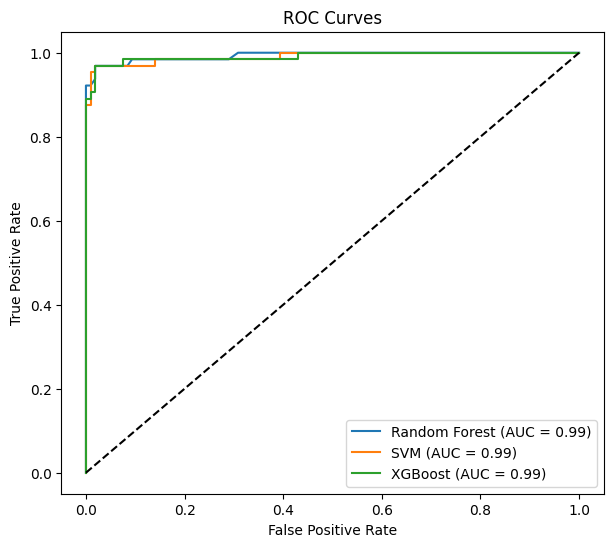

In [57]:
# Call functions 
for name, model in models.items():
    plot_confusion_matrix(model, X_test_scaled, y_test, name)
plot_roc_curves(models, X_test_scaled, y_test)

In [41]:
import joblib
best_model=models["Random Forest"]
joblib.dump(best_model, "best_breast_cancer_model.joblib")
print("Model saved successfully")

Model saved successfully


In [42]:
loaded_model=joblib.load("best_breast_cancer_model.joblib")

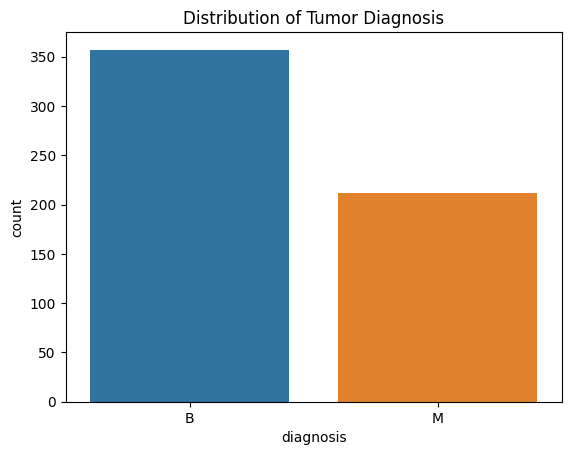

In [44]:
sns.countplot(x='diagnosis', data=cancer)
plt.title('Distribution of Tumor Diagnosis')
plt.savefig('distribution_diagnosis.png', dpi=300, bbox_inches='tight')  # Guarda el gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

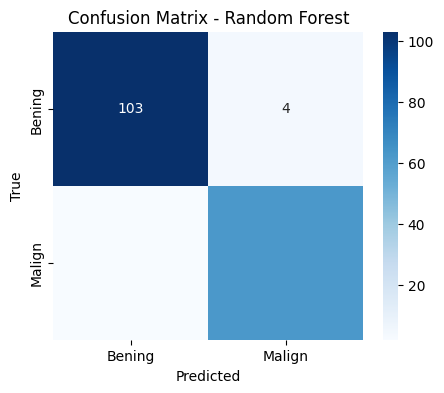

In [59]:
import matplotlib.pyplot as plt

plt.figure()  # Crear una figura nueva
plot_confusion_matrix(models["Random Forest"], X_test_scaled, y_test, "Random Forest")
plt.title("Confusion Matrix - Random Forest")
plt.savefig('images/confusion_matrix_rf.png', dpi=300, bbox_inches='tight')
plt.close()  # Cierra la figura para liberar memoria